In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# 1.Сбор данных

In [4]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [6]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [8]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [9]:
sample_submission.head(5)

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

Признаки:
- hotel_address - адрес отеля
- review_date - дата, когда рецензент разместил соответствующий отзыв.
- average_score - средний балл отеля, рассчитанный на основе последнего комментария за последний год
- hotel_name - название отеля
- reviewer_nationality - национальность рецензента
- negative_review - отрицательный отзыв, который рецензент дал отелю.
- review_total_negative_word_counts - общее количество слов в отрицательном отзыв
- positive_review - положительный отзыв, который рецензент дал отелю
- review_total_positive_word_counts - общее количество слов в положительном отзыве
- reviewer_score - оценка, которую рецензент поставил отелю на основе своего опыта
- total_number_of_reviews_reviewer_has_given - количество отзывов, которые рецензенты дали в прошлом
- total_number_of_reviews - общее количество действительных отзывов об отеле
- tags - теги, которые рецензент дал отелю.
- days_since_review - продолжительность между датой проверки и датой очистки
- additional_number_of_scoring - есть также некоторые гости, которые просто поставили оценку сервису, а не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
- lat - широта отеля
- lng - долгота отеля
- sample - признак 'train/test'

# 2.Очистка данных. Заполнение пропусков. Добавление новых признаков.

In [13]:
# поиск строк-дубликатов 
duplicateRows = data[data.duplicated()]
duplicateRows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 26726 to 514376
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   hotel_address                               336 non-null    object 
 1   additional_number_of_scoring                336 non-null    int64  
 2   review_date                                 336 non-null    object 
 3   average_score                               336 non-null    float64
 4   hotel_name                                  336 non-null    object 
 5   reviewer_nationality                        336 non-null    object 
 6   negative_review                             336 non-null    object 
 7   review_total_negative_word_counts           336 non-null    int64  
 8   total_number_of_reviews                     336 non-null    int64  
 9   positive_review                             336 non-null    object 
 10  review_

In [14]:
# удаление дубликатов
# data = data.drop_duplicates(keep='first')
# data.info()

In [15]:
# найдем признаки,где доля пропусков больше 0.
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

lat    0.633655
lng    0.633655
dtype: float64

Признаки, которые имеют пропуск - это широта и долгота отеля.

In [16]:
# добавим новый признак - 'country'. Страна, в которой находится отель, чтобы заполнить признаки 'lat' и 'lng' средним значением.
data['country'] = data['hotel_address'].str.split(n=-1).str[-1].str.join('')
data['country'].value_counts()

Kingdom        262301
Spain           60149
France          59928
Netherlands     57214
Austria         38939
Italy           37207
Name: country, dtype: int64

In [17]:
# заполняем пропуски в признаке 'lat' средним значение в зависимости от страны
mask1 = (data['country'] == 'Kingdom') & data['lat'].isna()
data.loc[mask1, 'lat'] = data['lat'].median()
mask2 = (data['country'] == 'Spain') & data['lat'].isna()
data.loc[mask2, 'lat'] = data['lat'].median()
mask3 = (data['country'] == 'France') & data['lat'].isna()
data.loc[mask3, 'lat'] = data['lat'].median()
mask4 = (data['country'] == 'Netherlands') & data['lat'].isna()
data.loc[mask4, 'lat'] = data['lat'].median()
mask5 = (data['country'] == 'Austria') & data['lat'].isna()
data.loc[mask5, 'lat'] = data['lat'].median()
mask6 = (data['country'] == 'Italy') & data['lat'].isna()
data.loc[mask6, 'lat'] = data['lat'].median()
# заполняем пропуски в признаке 'lat' средним значение в зависимости от страны
mask7 = (data['country'] == 'Kingdom') & data['lng'].isna()
data.loc[mask7, 'lng'] = data['lat'].median()
mask8 = (data['country'] == 'Spain') & data['lng'].isna()
data.loc[mask8, 'lng'] = data['lat'].median()
mask9 = (data['country'] == 'France') & data['lng'].isna()
data.loc[mask9, 'lng'] = data['lat'].median()
mask10 = (data['country'] == 'Netherlands') & data['lng'].isna()
data.loc[mask10, 'lng'] = data['lat'].median()
mask11 = (data['country'] == 'Austria') & data['lng'].isna()
data.loc[mask11, 'lng'] = data['lat'].median()
mask12 = (data['country'] == 'Italy') & data['lng'].isna()
data.loc[mask12, 'lng'] = data['lat'].median()
# выводим результирующую долю пропусков
data.isnull().mean()

hotel_address                                 0.0
additional_number_of_scoring                  0.0
review_date                                   0.0
average_score                                 0.0
hotel_name                                    0.0
reviewer_nationality                          0.0
negative_review                               0.0
review_total_negative_word_counts             0.0
total_number_of_reviews                       0.0
positive_review                               0.0
review_total_positive_word_counts             0.0
total_number_of_reviews_reviewer_has_given    0.0
tags                                          0.0
days_since_review                             0.0
lat                                           0.0
lng                                           0.0
sample                                        0.0
reviewer_score                                0.0
country                                       0.0
dtype: float64

In [18]:
# добавим новый признак - 'days', в который укажем количество дней из 'days_since_review'
data['days'] = data['days_since_review'].str.split(n=1).str[0:1:1].str.join('')
data['days'] = data['days'].astype('int64')
data.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score,country,days
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0.0,Italy,13
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0,0.0,Netherlands,234


In [19]:
# проверяем полученный фрейм данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

# 3.EDA

In [ ]:
# Построим график попарных отношений признаков на основе копии df

data_copy = data.copy()
# !pip install --statistics
import statistics

sns.pairplot(data_copy)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [22]:
# посмотрим на количество уникальных признаков для определения метода кодировки нечисловых признаков
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1472
lng                                             1473
sample                                             2
reviewer_score                                    38
country                                       

In [23]:
# закодируем категориальный признак 'country'
import category_encoders as ce

# Создание экземпляра класса OrdinalEncoder()
encoder = ce.OneHotEncoder(cols=['country'])
type_bin = encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)
data['country'].value_counts()


Kingdom        262301
Spain           60149
France          59928
Netherlands     57214
Austria         38939
Italy           37207
Name: country, dtype: int64

In [24]:
# закодируем категориальный признак 'reviewer_nationality'
import category_encoders as ce

# Создание экземпляра класса OrdinalEncoder()
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality'])
type_bin = bin_encoder.fit_transform(data['reviewer_nationality'])
data = pd.concat([data, type_bin], axis=1)

<AxesSubplot:>

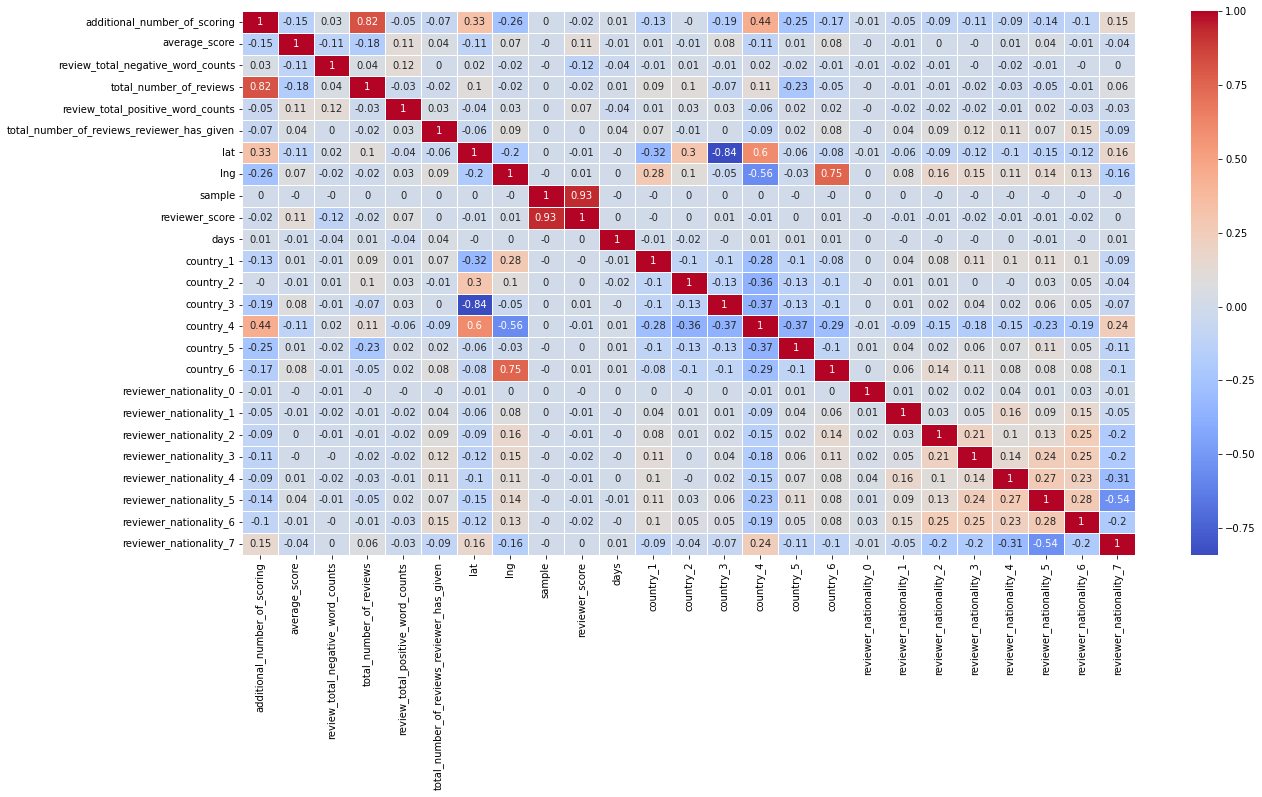

In [25]:
# Расчитаем коэффициенты корреляции и визуализируем полученные данные
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(round(data.corr(), 2), annot=True, linewidths=.9, cmap='coolwarm')

Наибольшая связь наблюдается в паре признаков 'reviewer_score' и 'sample', что является очень сильной связью, а также большая связь наблюдается в паре признаков 'total_number_of_reviews' и 'additional_number_of_scoring', что приводит к мультиколлинеарности признаков.

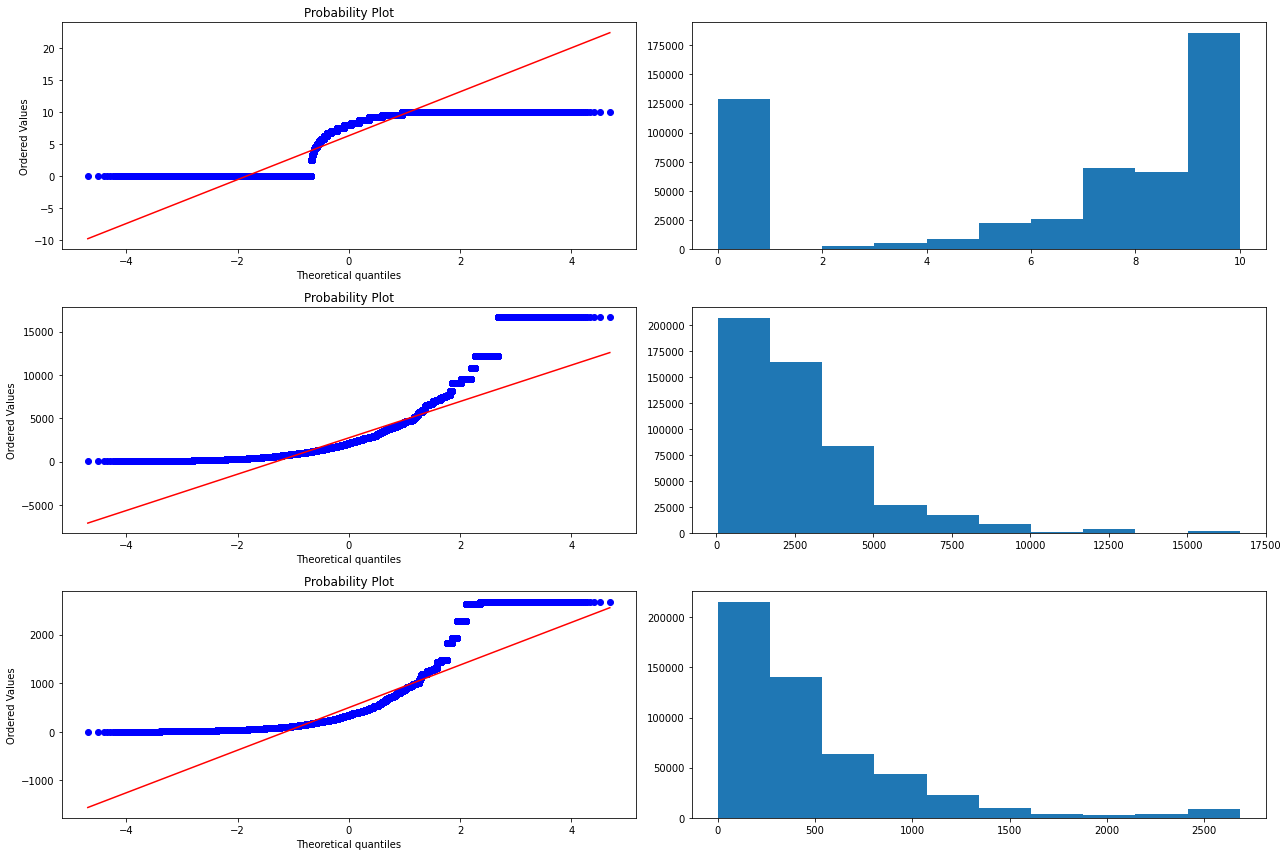

In [26]:
# проверим наши данные на нормальность для признаков 'reviewer_score', 'total_number_of_reviews' и 'additional_number_of_scoring'. 
# признак'sample' проверять не будем, так как это введные признак для определения трейн/тест данных. 
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['reviewer_score'], plot=plt) # qq plot

plt.subplot(3, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['reviewer_score']) # гистограмма распределения признака

plt.subplot(3, 2, 3) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['total_number_of_reviews'], plot=plt) # qq plot

plt.subplot(3, 2, 4) # располагаем четвертый рисунок рядом
plt.hist(data['total_number_of_reviews']) # гистограмма распределения признака

plt.subplot(3, 2, 5) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['additional_number_of_scoring'], plot=plt) # qq plot

plt.subplot(3, 2, 6) # располагаем шестой рисунок рядом
plt.hist(data['additional_number_of_scoring']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Признаки 'total_number_of_reviews' и 'additional_number_of_scoring' распределены ненормально, так как q-q plot имеет изогнутую линию, а гистограмма распределения не похожа на колокол.

In [27]:
# так как данные распределены ненормально, то мы их нормализуем. 
# Из графика попарных отношений признаков мы видим, что в данных есть выбросы, поэтому для нормализации будем использовать RubustScaler

# предварительно удалим нечисловые признаки
data = data.select_dtypes(exclude=['object'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   lat                                         515738 non-null  float64
 7   lng                                         515738 non-null  float64
 8   sample                                      515738 non-null  int64  
 9   reviewer_score                              515738 non-null  float64
 

In [28]:
# выведем описательные статистики до преобразования
data.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,sample,reviewer_score,...,country_5,country_6,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,...,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,49.455477,3.132242,0.749999,6.297672,...,0.116199,0.075502,0.002827,0.055014,0.111167,0.188716,0.195582,0.336023,0.258695,0.685999
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,3.459181,5.979697,0.433014,3.902295,...,0.320463,0.264199,0.053095,0.228009,0.314339,0.391283,0.396648,0.472347,0.437918,0.464117
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,41.328376,-0.369758,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,48.214662,-0.143372,0.250000,0.625000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,51.499981,0.019886,1.000000,7.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,51.516288,4.841163,1.000000,9.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,52.400181,51.499981,1.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


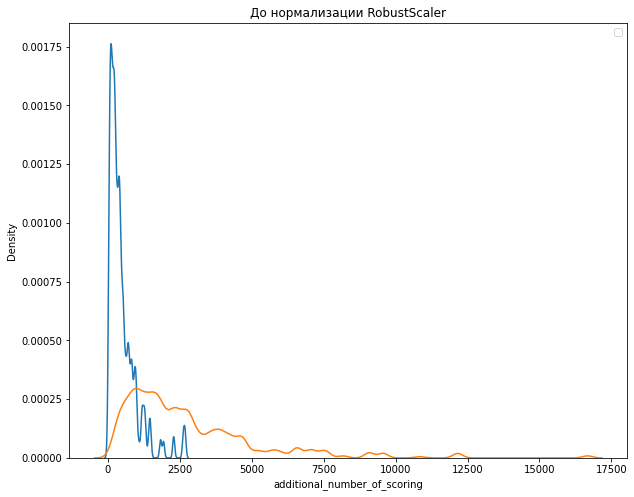

In [29]:
# визуализация до нормализации признаков
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('До нормализации RobustScaler')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(data['additional_number_of_scoring'], ax=ax1)
sns.kdeplot(data['total_number_of_reviews'], ax=ax1)

plt.legend()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   lat                                         515738 non-null  float64
 7   lng                                         515738 non-null  float64
 8   sample                                      515738 non-null  int64  
 9   reviewer_score                              515738 non-null  float64
 

In [31]:
# разбиваем df по признакам для дальнейшей нормализации некоторых признаков
# признаки 0 - 7
df1_1 = data.loc[:, 'additional_number_of_scoring':'lng']
# признак 10
df1_2 = data.loc[:, ['days']]
# признаки 8-9 не подлежат нормализации
df2_1 = data.loc[:, 'sample':'reviewer_score']
# признаки 11-24 не подлежат нормализации
df2_2 = data.loc[:, 'country_1':'reviewer_nationality_7']
# pd.concat([df1, df2], ignore_index=True)

# объединение df с признаками подлежащих нормализации
df1 = df1_1.join(df1_2, how='left')
# объединение df с признаками не подлежащих нормализации
df2 = df2_1.join(df2_2, how='left')

In [32]:
df2.head(2)

,sample,reviewer_score,country_1,country_2,country_3,country_4,country_5,country_6,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


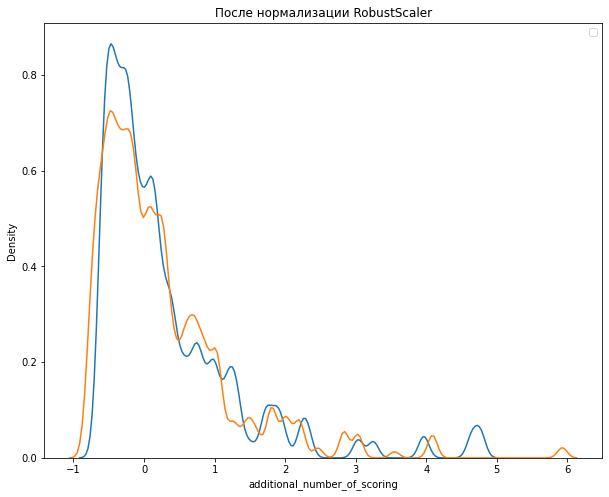

In [33]:
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


r_scaler = preprocessing.RobustScaler()

data_r = r_scaler.fit_transform(df1)

col_names = list(df1.columns)
data_r = pd.DataFrame(data_r, columns=col_names)

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации RobustScaler')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(data_r['additional_number_of_scoring'], ax=ax1)
sns.kdeplot(data_r['total_number_of_reviews'], ax=ax1)

plt.legend()

In [34]:
# выведем описательные статистики после преобразования
data_r.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,days
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,0.319922,-0.003590,0.454260,0.248672,0.398615,0.595143,-0.619242,0.624403,0.004096
std,1.019427,0.782926,1.413849,0.945132,1.282599,1.577175,1.047720,1.199650,0.593546
min,-0.692464,-4.571429,-0.428571,-0.852773,-0.647059,-0.285714,-3.080787,-0.078171,-1.002841
25%,-0.350305,-0.428571,-0.333333,-0.396819,-0.352941,-0.285714,-0.995061,-0.032753,-0.505682
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.649695,0.571429,0.666667,0.603181,0.647059,0.714286,0.004939,0.967247,0.494318
max,4.767821,2.000000,19.000000,5.928222,22.588235,50.285714,0.272654,10.327964,1.071023


In [35]:
# объеденим фреймы данных
data = data_r.join(df2, how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  float64
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  float64
 3   total_number_of_reviews                     515738 non-null  float64
 4   review_total_positive_word_counts           515738 non-null  float64
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  float64
 6   lat                                         515738 non-null  float64
 7   lng                                         515738 non-null  float64
 8   days                                        515738 non-null  float64
 9   sample                                      515738 non-null  int64  
 

<AxesSubplot:>

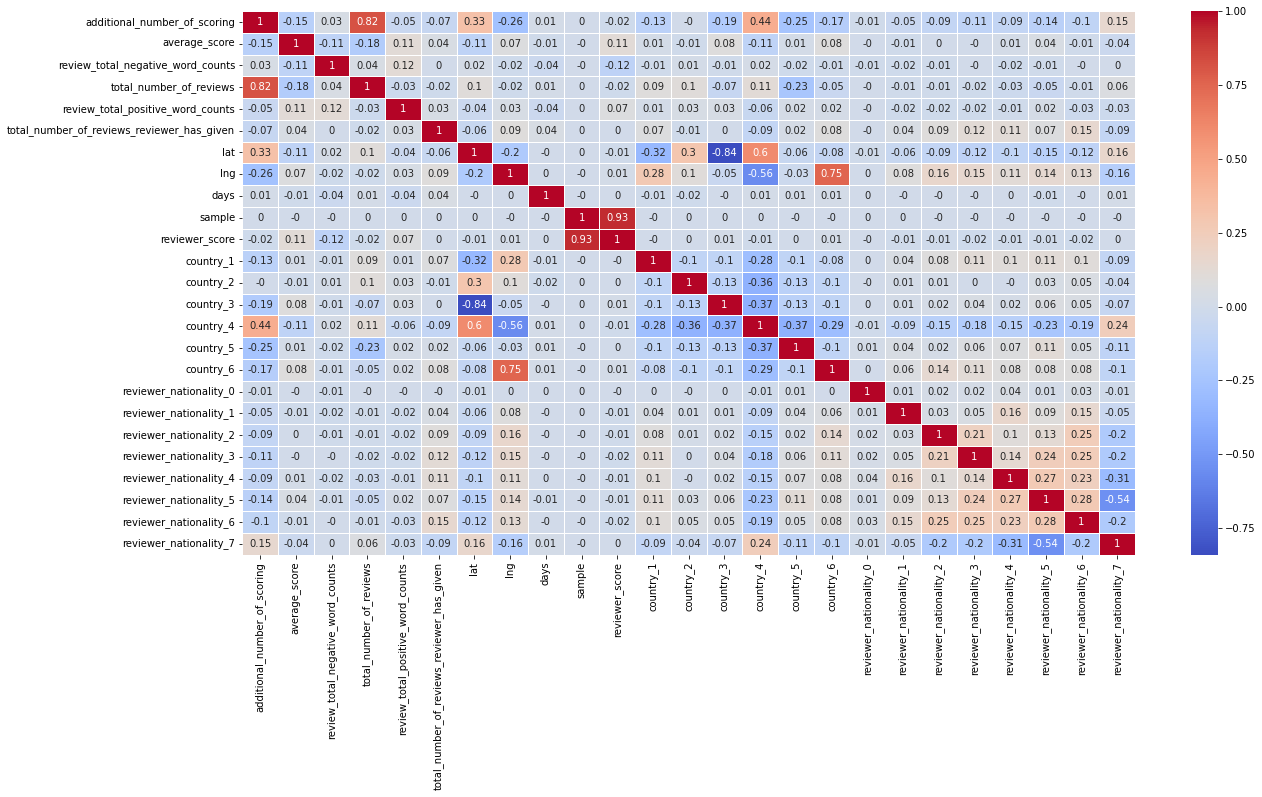

In [36]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(round(data.corr(), 2), annot=True, linewidths=.9, cmap='coolwarm')

In [37]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128935 entries, 0 to 128934
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                128935 non-null  float64
 1   average_score                               128935 non-null  float64
 2   review_total_negative_word_counts           128935 non-null  float64
 3   total_number_of_reviews                     128935 non-null  float64
 4   review_total_positive_word_counts           128935 non-null  float64
 5   total_number_of_reviews_reviewer_has_given  128935 non-null  float64
 6   lat                                         128935 non-null  float64
 7   lng                                         128935 non-null  float64
 8   days                                        128935 non-null  float64
 9   reviewer_score                              128935 non-null  float64
 

In [39]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [40]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 24), (386803, 24), (386803, 23), (309442, 23), (77361, 23))

In [41]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [42]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [43]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


In [44]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.9473639539672072


<AxesSubplot:>

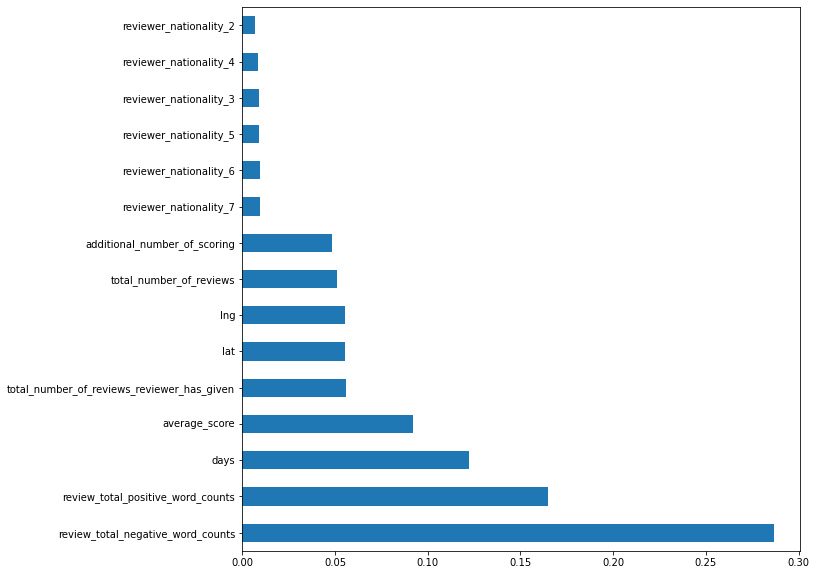

In [45]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [46]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,days,reviewer_score,...,country_5,country_6,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
104249,0.596741,-0.714286,-0.428571,0.787520,-0.176471,0.285714,0.004939,-0.038518,-0.349432,0.0,...,0,0,0,0,0,0,0,1,1,0
13550,-0.272912,0.142857,-0.095238,0.190457,-0.176471,-0.142857,-1.823502,1.840745,-0.732955,0.0,...,0,0,0,0,0,1,1,1,0,0
4785,-0.336049,0.428571,-0.190476,-0.567292,1.705882,-0.285714,-0.001454,-0.040869,0.576705,0.0,...,0,0,0,0,0,1,0,1,1,0
38855,0.152749,0.142857,-0.428571,1.241028,-0.294118,-0.285714,-0.995061,3.278724,-0.230114,0.0,...,0,1,0,0,1,1,1,0,0,1
34505,1.004073,1.000000,-0.142857,1.041191,0.235294,0.142857,0.263677,0.976773,-0.380682,0.0,...,0,0,0,0,0,1,0,0,1,1
1080,0.407332,-0.714286,-0.095238,1.899674,0.941176,-0.142857,-3.055760,0.434688,-0.843750,0.0,...,0,0,0,0,0,0,0,1,0,0
40929,0.154786,0.714286,-0.333333,-0.159054,-0.058824,-0.285714,0.006254,-0.022353,-0.440341,0.0,...,0,0,0,0,1,0,0,1,1,0
102287,0.112016,-0.714286,0.476190,0.738173,-0.352941,1.285714,-3.059416,0.437861,-0.980114,0.0,...,0,0,0,0,1,0,0,1,0,1
13502,-0.584521,0.285714,-0.238095,-0.524878,-0.117647,-0.142857,-3.060870,0.427135,-0.741477,0.0,...,0,0,0,0,0,0,0,0,0,1
56606,-0.446029,0.714286,-0.238095,-0.520392,-0.529412,0.285714,-0.797539,0.458230,0.673295,0.0,...,1,0,0,0,1,1,0,1,1,1


In [47]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [48]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [49]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.6s finished


In [50]:
predict_submission

array([8.501, 7.321, 7.727, ..., 8.353, 9.616, 7.694])

In [51]:
list(sample_submission)

['reviewer_score', 'id']

In [52]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.501,488440
1,7.321,274649
2,7.727,374688
3,9.463,404352
4,9.738,451596
5,8.818,302161
6,8.103,317079
7,7.615,13963
8,8.720,159785
9,7.865,195089
